## Dependencias

In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs,load_iris

from sklearn.linear_model import Perceptron,PassiveAggressiveClassifier
from sklearn.svm import SVC 

from sklearn.model_selection import train_test_split,GridSearchCV  
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from functools import reduce 

cf.go_offline()

## Datos Sintéticos

In [53]:
X,y = make_blobs(n_samples=1000,centers=2,random_state=0,cluster_std=0.5)

## Partición

In [54]:
Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3)

In [55]:
Xt.shape,Xv.shape,yt.shape,yv.shape

((700, 2), (300, 2), (700,), (300,))

## Aprendizaje

### Perceptrón

In [56]:
per = Perceptron()
per.fit(Xt,yt)

Perceptron()

#### Vector de parámetros $\vec{\theta}$ y sesgo ${\theta_0}$

In [57]:
per.coef_,per.intercept_

(array([[ 8.85882394, -9.74730678]]), array([10.]))

In [58]:
def dibujarClasificador(X,y,clf):
    plt.figure(figsize=(5,5))
    # Crear un gráfico de dispersión de los datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

    # Crear los límites del gráfico
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    # Crear una cuadrícula para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 10)
    yy = np.linspace(ylim[0], ylim[1], 10)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Entrenar el modelo

    # Crear la línea de decisión
    Z = clf.decision_function(xy).reshape(XX.shape)
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Mostrar el gráfico
    plt.show()


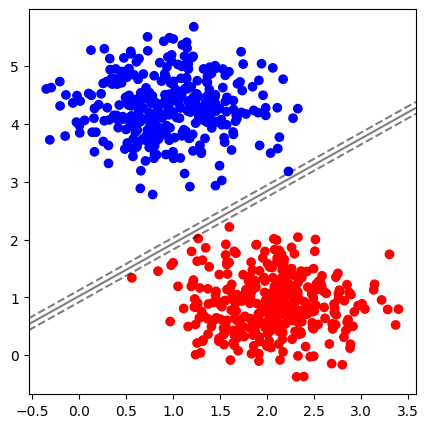

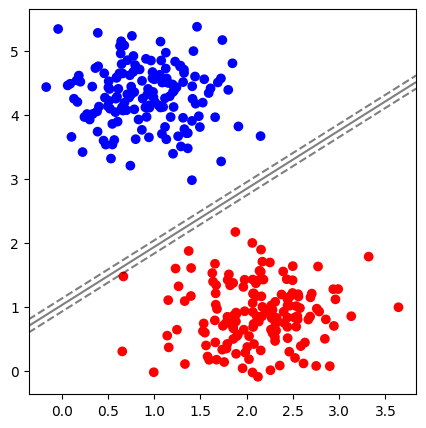

In [59]:
dibujarClasificador(Xt,yt,per)
dibujarClasificador(Xv,yv,per)

In [60]:
accuracy_score(yt,per.predict(Xt)),accuracy_score(yv,per.predict(Xv))

(1.0, 1.0)

In [61]:
confusion_matrix(yt,per.predict(Xt)),confusion_matrix(yv,per.predict(Xv))

(array([[349,   0],
        [  0, 351]]),
 array([[151,   0],
        [  0, 149]]))

## Pasivo-Agresivo

### Híper-Parametrización

In [62]:
hp = {'C':np.arange(0.01,2,0.01)}
print(reduce(lambda x,y:x*y,[len(hp[k]) for k in hp]))

199


In [63]:
pa = PassiveAggressiveClassifier()

In [64]:
grid = GridSearchCV(estimator=pa,param_grid=hp,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(Xt,yt)

GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])},
             scoring='accuracy')

In [65]:
grid.best_params_,grid.best_score_

({'C': 0.05}, 1.0)

### Estimación de parámetros 

In [66]:
pa = grid.best_estimator_
pa.fit(Xt,yt)

PassiveAggressiveClassifier(C=0.05)

### Vector de parámetros $\vec{\theta}$ y sesgo ${\theta_0}$

In [67]:
pa.coef_,pa.intercept_

(array([[ 1.42707648, -1.83187033]]), array([2.62985571]))

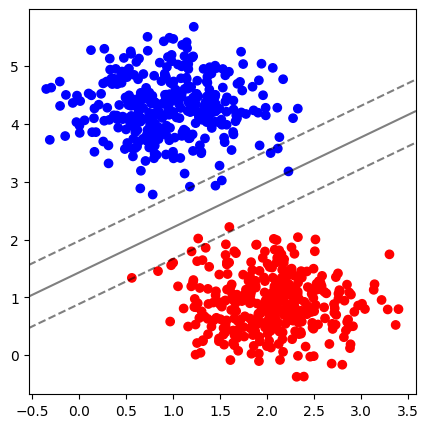

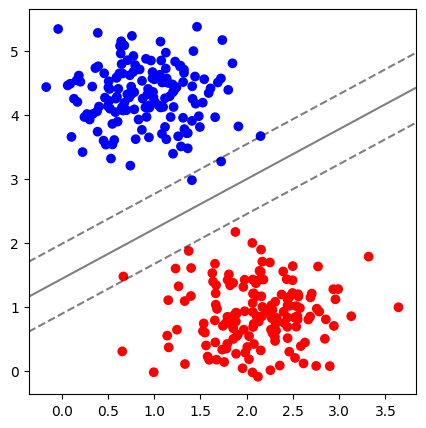

In [68]:
dibujarClasificador(Xt,yt,pa)
dibujarClasificador(Xv,yv,pa)

In [69]:
accuracy_score(yt,pa.predict(Xt)),accuracy_score(yv,pa.predict(Xv))

(1.0, 1.0)

In [70]:
confusion_matrix(yt,pa.predict(Xt)),confusion_matrix(yv,pa.predict(Xv))

(array([[349,   0],
        [  0, 351]]),
 array([[151,   0],
        [  0, 149]]))

## Máquina Vector Soporte

### Híper-Parametrización

In [ ]:
svm_hp = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}


In [71]:
hp =  {'C': np.arange(0.1,2,0.1), 'kernel': ['linear', 'rbf', 'poly'],
         'degree':np.arange(1,5,1)
       }
print(reduce(lambda x,y:x*y,[len(hp[k]) for k in hp]))

228


In [72]:
svm = SVC()

In [73]:
grid = GridSearchCV(estimator=svm,param_grid=hp,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(Xt,yt)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'degree': array([1, 2, 3, 4]),
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [74]:
grid.best_params_,grid.best_score_

({'C': 0.1, 'degree': 1, 'kernel': 'linear'}, 1.0)

### Estimación de parámetros 

In [75]:
svm = grid.best_estimator_
svm.fit(Xt,yt)

SVC(C=0.1, degree=1, kernel='linear')

### Vector de parámetros $\vec{\theta}$ y sesgo ${\theta_0}$

In [76]:
svm.coef_,svm.intercept_

(array([[ 0.3186944 , -1.20732155]]), array([2.64553409]))

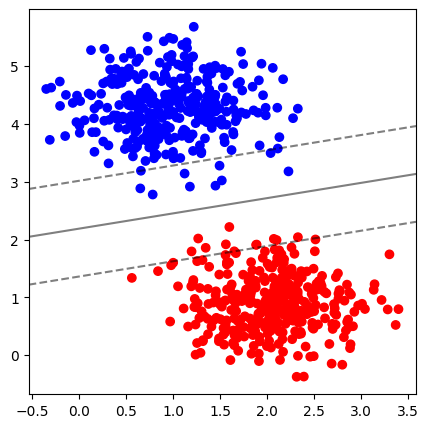

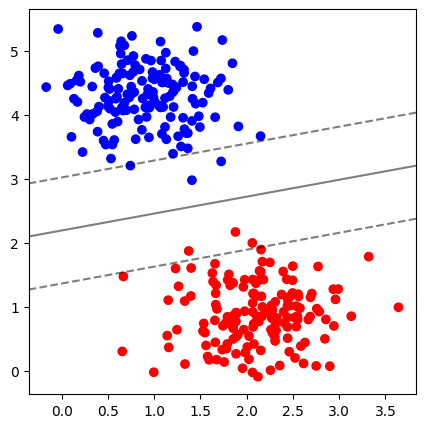

In [77]:
dibujarClasificador(Xt,yt,svm)
dibujarClasificador(Xv,yv,svm)

In [78]:
accuracy_score(yt,svm.predict(Xt)),accuracy_score(yv,svm.predict(Xv))

(1.0, 1.0)

In [79]:
confusion_matrix(yt,svm.predict(Xt)),confusion_matrix(yv,svm.predict(Xv))

(array([[349,   0],
        [  0, 351]]),
 array([[151,   0],
        [  0, 149]]))